Q-learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gym
from gym import spaces


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
def create_gridworld(size=5, start=(0,0), goal=(4,4)):
    """Create a GridWorld environment as a dictionary with state and spaces."""
    env = {
        "size": size,
        "start": np.array(start, dtype=int),
        "goal": np.array(goal, dtype=int),
        "agent_pos": np.array(start, dtype=int),
        "observation_space": spaces.MultiDiscrete([size, size]),
        "action_space": spaces.Discrete(4)
    }
    return env

In [4]:
import numpy as np

def q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1):
    size = env["size"]
    n_actions = env["action_space"].n
    goal = tuple(env["goal"])

    # Initialize Q(s,a) arbitrarily
    Q = np.zeros((size, size, n_actions))
    
    def choose_action(state):
        r, c = state
        if np.random.rand() < epsilon:
            return np.random.randint(n_actions)  # explore
        else:
            return np.argmax(Q[r, c])           # exploit
    
    for ep in range(num_episodes):
        obs = reset(env)
        done = False
        
        while not done:
            r, c = obs
            action = choose_action((r, c))
            next_obs, reward, done = step(env, action)
            nr, nc = next_obs
            
            # Q-Learning update (off-policy)
            Q[r, c, action] += alpha * (reward + gamma * np.max(Q[nr, nc]) - Q[r, c, action])
            
            obs = next_obs
    
    # Derive greedy policy from Q
    policy = np.argmax(Q, axis=2)
    return Q, policy


In [5]:
def reset(env):
    env["agent_pos"] = env["start"].copy()
    return env["agent_pos"]

In [6]:
def render_plot(env):
    """Render the grid using matplotlib"""
    size = env["size"]
    grid = np.zeros((size, size))

    r, c = env["agent_pos"]
    gr, gc = env["goal"]

    # Goal = 2, Agent = 1
    grid[gr, gc] = 2
    grid[r, c] = 1

    plt.imshow(grid, cmap="Pastel1", origin="upper")
    plt.xticks(range(size))
    plt.yticks(range(size))
    plt.grid(True, which="both", color="black", linewidth=1)
    plt.show()


In [7]:
def step(env, action):
    r, c = env["agent_pos"]
    size = env["size"]
    goal = env["goal"]

    if action == 0:      # UP
        r = max(0, r-1)
    elif action == 1:    # RIGHT
        c = min(size-1, c+1)
    elif action == 2:    # DOWN
        r = min(size-1, r+1)
    elif action == 3:    # LEFT
        c = max(0, c-1)

    env["agent_pos"] = np.array([r, c])
    done = np.array_equal(env["agent_pos"], goal)
    reward = 10 if done else -1
    return env["agent_pos"], reward, done

In [8]:
def run_policy(env, policy):
    obs = reset(env)
    total_reward = 0
    done = False
    
    while not done:
        r, c = obs
        action = policy[r, c]
        obs, reward, done = step(env, action)
        total_reward += reward
        render_plot(env)
        print(f"Action: {action}, Obs: {obs}, Reward: {reward}, Accumulated: {total_reward}")
    
    print("Episode finished! Total reward:", total_reward)


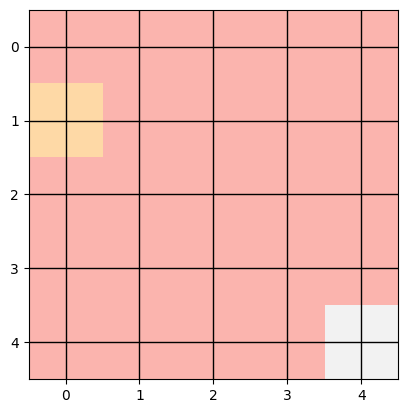

Action: 2, Obs: [1 0], Reward: -1, Accumulated: -1


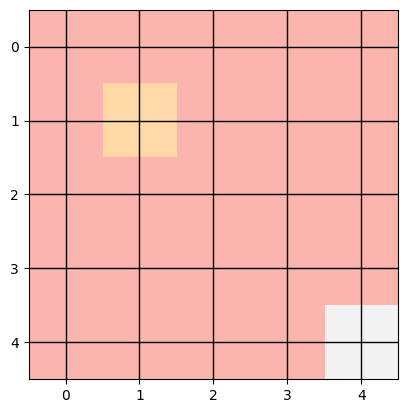

Action: 1, Obs: [1 1], Reward: -1, Accumulated: -2


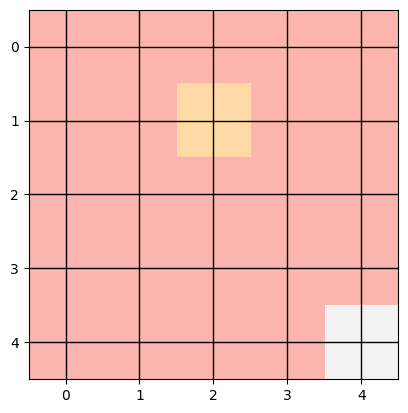

Action: 1, Obs: [1 2], Reward: -1, Accumulated: -3


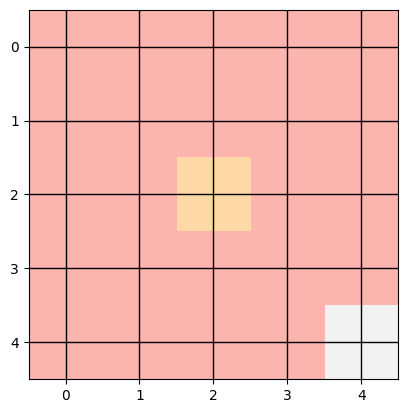

Action: 2, Obs: [2 2], Reward: -1, Accumulated: -4


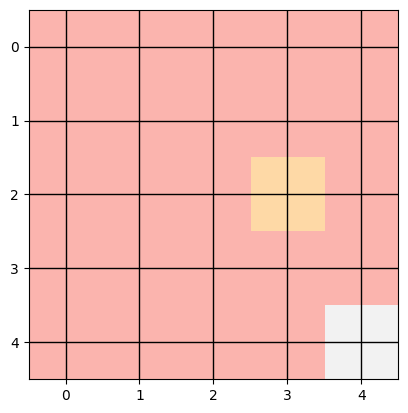

Action: 1, Obs: [2 3], Reward: -1, Accumulated: -5


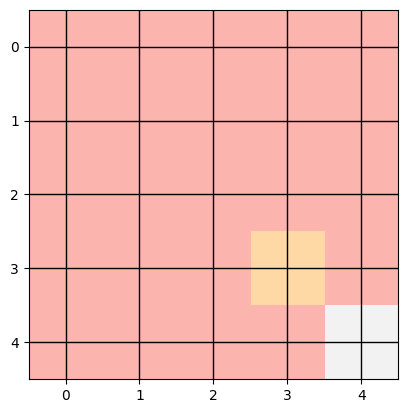

Action: 2, Obs: [3 3], Reward: -1, Accumulated: -6


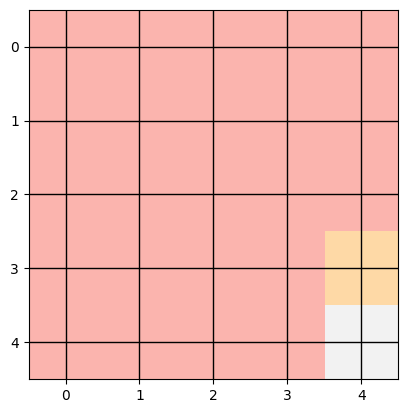

Action: 1, Obs: [3 4], Reward: -1, Accumulated: -7


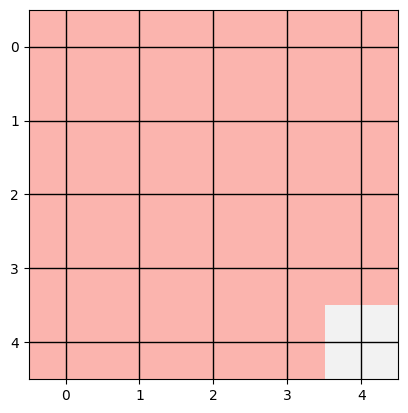

Action: 2, Obs: [4 4], Reward: 10, Accumulated: 3
Episode finished! Total reward: 3


In [9]:
env = create_gridworld()
Q, policy = q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1)
run_policy(env, policy)
